<a href="https://colab.research.google.com/github/100495773/Grupo05_Practica1/blob/main/notebook_busqueda_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICA 1 APRENDIZAJE AUTOMATICO
#(Fernando Mendizabal - 100495773)
En esta práctica aprenderemos a analizar datos, entrenar modelos y crear predicciones en base a un dataset sobre el que trabajaremos. Entrenaremos los modelos con el dataframe "availabledata" para posteriormente, al escogerse el modelo final, se evalúen predicciones del dataframe "competition".

Para empezar, deberemos cargar los datos a procesar en nuestro código. Como hemos dicho anteriormente, cargaremos el "availabledata" correspondiente a nuestro grupo de trabajo.

In [124]:
from google.colab import files
uploaded = files.upload()

Saving attrition_availabledata_05.csv to attrition_availabledata_05 (1).csv


Aquí especificaremos todos los imports de las bibliotecas python pertinentes empleadas en la práctica, con el fin de que el código se encuentre ordenado y la introducción de nuevas librerías fuese más simple.

In [195]:
%matplotlib inline
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesamiento y modelización
# ==============================================================================
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB

# Bibliotecas varias
# ==============================================================================
import time

Introducimos la información de este dataset a un dataframe que pueda ser manipulado a través de las herramientas ofrecidas por las diferentes bibliotecas de sklearn.

In [126]:
df = pd.read_csv('attrition_availabledata_05.csv')

#EDA (Exploratory Data Analysis)







Una vez cargados los datos, podemos comenzar a crear nuestro modelo de aprendizaje. El primer paso a realizar es un proceso EDA (Exploratory Data Analysis). El fin de realizar a cabo dicho proceso es el de entender los datos con los que tratamos.

In [4]:
df.head()

hrs  absences  JobInvolvement  PerformanceRating  \
0  6.612625        18               4                  3   
1  6.026815        18               3                  3   
2  6.966456        11               3                  3   
3  6.678438        12               4                  3   
4  6.235761        10               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0                      3.0              3.0              2.0   31   
1                      4.0              4.0              2.0   31   
2                      4.0              1.0              3.0   33   
3                      4.0              1.0              1.0   48   
4                      3.0              3.0              2.0   42   

      BusinessTravel              Department  ...  Over18  PercentSalaryHike  \
0  Travel_Frequently                   Sales  ...       Y                 17   
1  Travel_Frequently                   Sales  ...       Y                 18   
2  Travel_Frequently         Human Resources  ...       Y                 14   
3      Travel_Rarely  Research & Development  ...       Y                 13   
4         Non-Travel  Research & Development  ...       Y                 18   

  StandardHours  StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0             8                 0                2.0                     3   
1             8                 1                9.0                     3   
2             8                 3                5.0                     2   
3             8                 1               21.0                     3   
4             8                 0               10.0                     2   

   YearsAtCompany YearsSinceLastPromotion YearsWithCurrManager  Attrition  
0               2                       2                    2        Yes  
1               5                       1                    4         No  
2               4                       0                    3         No  
3               3                       0                    2         No  
4               6                       3                    3         No  

[5 rows x 31 columns]

A continuación, averiguaremos cuantas instancias y atributos hay en el dataset, que tipos de atributos son (categóricos o numéricos), y cuantos valores nulos y cuántos únicos hay.

In [5]:
print('Shape of Data Table (Instances, Attributes):')
print('===============================')
print(df.shape)
print()

print('Types of Attributes:')
print('================================')
df.info()

print()

print('Missing Values per Attribute:')
print('======================================')
print(df.isnull().sum())

print()

print('Unique Values per Attribute:')
print('======================================')
print(df.nunique())


Shape of Data Table (Instances, Attributes):
(2940, 31)

Types of Attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2924 non-null   float64
 5   JobSatisfaction          2923 non-null   float64
 6   WorkLifeBalance          2920 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  

Podemos ver que hay 31 atributos con 2940 instancias. También podemos diferenciar cuáles variables son categóricas. Por último, aparecen las variables con valores nulos y únicos. Para los valores únicos, consideraremos las variables que destaquen posibles instancias duplicadas. Podemos ver que hrs y EmployeeID son variables ID, ya que en ellas cada instancia tiene un valor para ella.

A continuacion, mostraremos las variables con valores faltantes. Se puede observar que el número de estas es tan bajo que es 'despreciable', no supone la necesidad de eliminarlos. Estos serán procesados posteriormente con los imputadores.

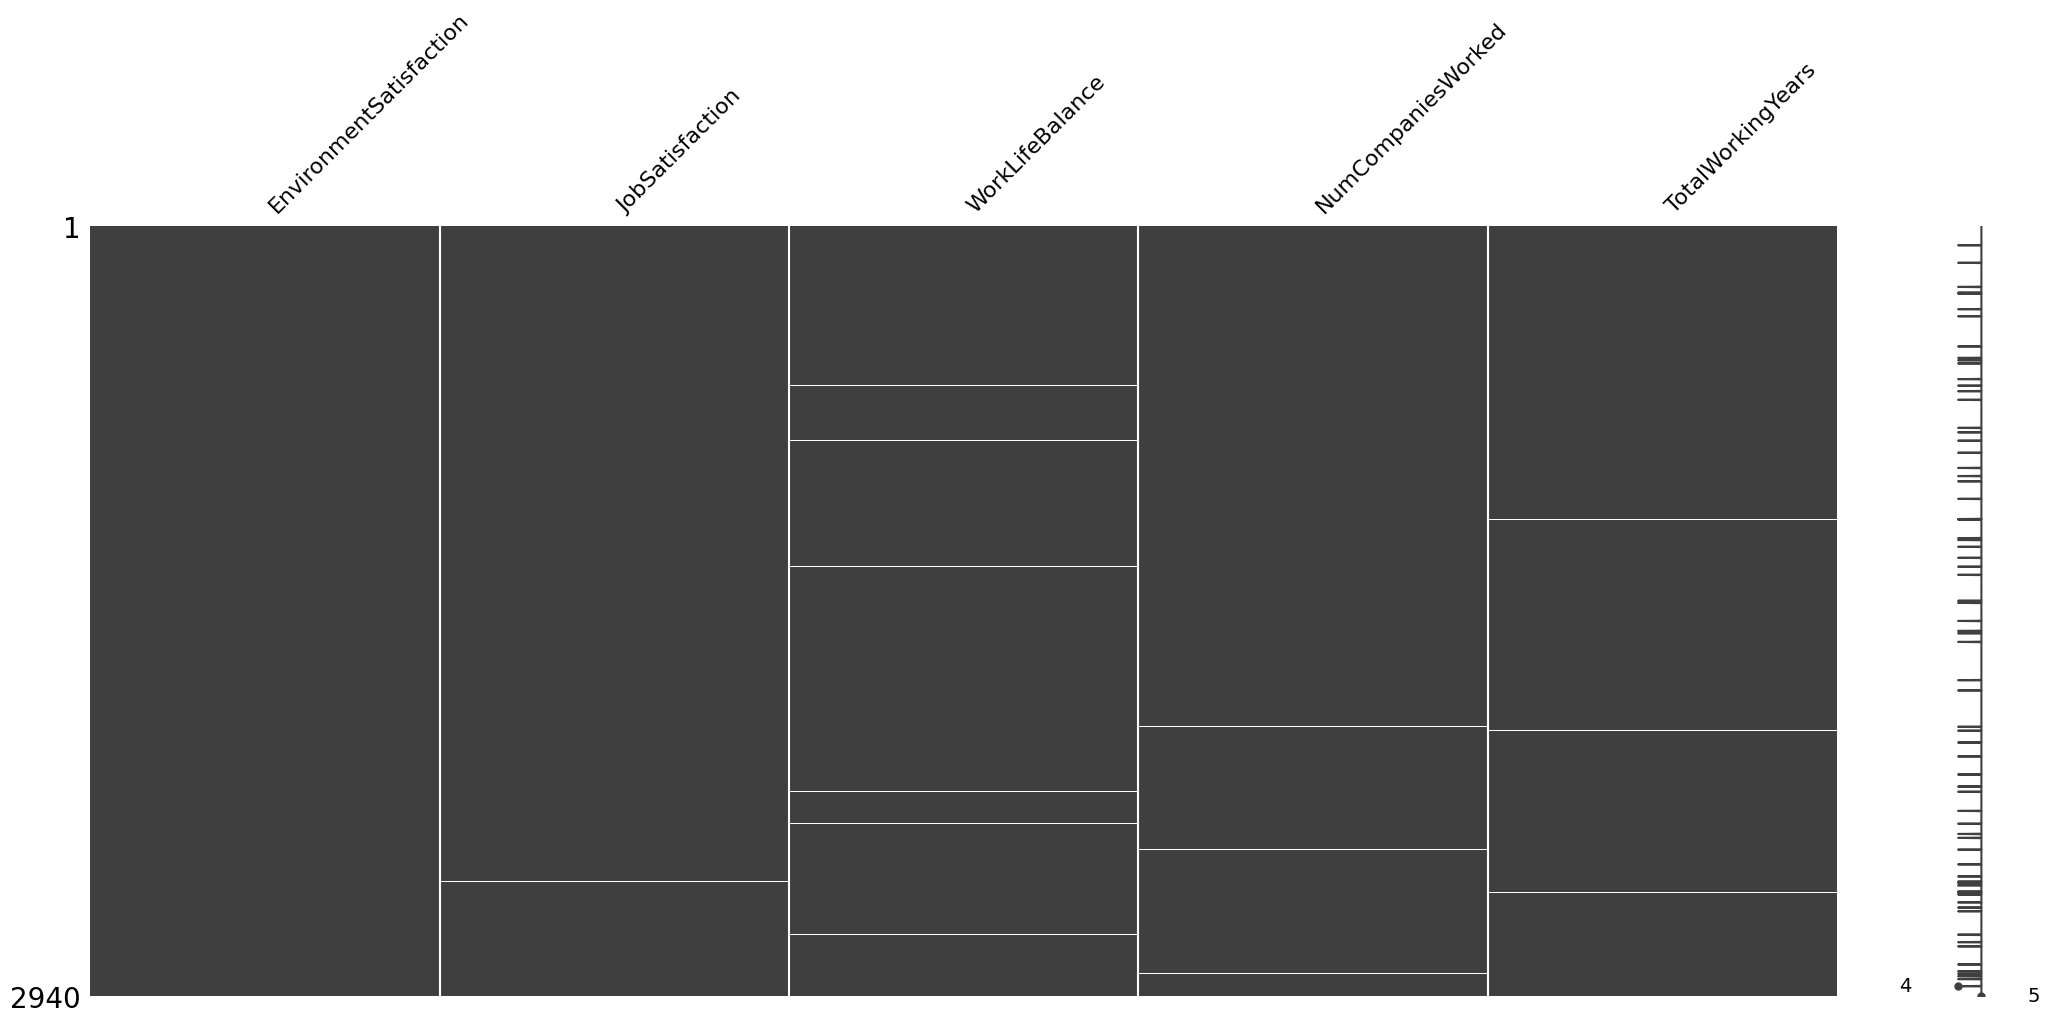

In [6]:
import missingno as msno
%matplotlib inline
%config InlineBackend.figure_format = 'png'

columns = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "NumCompaniesWorked", "TotalWorkingYears"]

msno.matrix(df[columns])
plt.show()

Lo principal que necesitamos analizar es los valores de la variable objetivo, con el fin de saber si estamos tratando con un problema desbalanceado. Además, servirá para comparar estas cifras con las ofrecidas por las predicciones de nuestro modelo final.

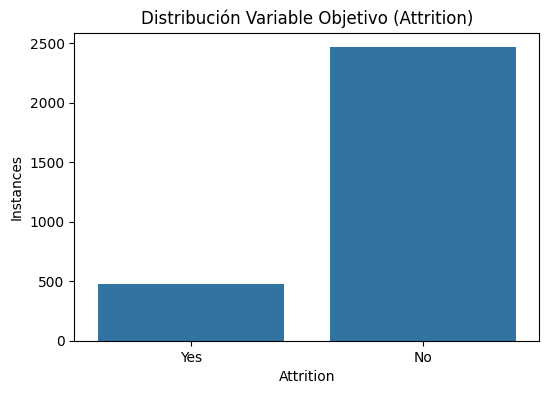

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Distribución Variable Objetivo (Attrition)")
plt.xlabel("Attrition")
plt.ylabel("Instances")
plt.show()

In [8]:
print(df['Attrition'].value_counts())

print()

print(df['Attrition'].value_counts()/df['Attrition'].count())

Attrition
No     2466
Yes     474
Name: count, dtype: int64

Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64


Como podemos observar tanto en la gráfica como en los valores numéricos, el 83% de los trabajadores sigue en la empresa mientras que el 16% se ha ido de ella. Al no ser un problema en el que ambos tipos de valores de 'Attrition' tienen proporciones similares, sabemos que el problema está desbalanceado. Al realizar el modelo deberemos emplear en los debidos lugares el parámetro 'balanced'.

Miramos los valores de todas las variables en un histograma, para saber de forma más visual los valores de cada variable de entrada.

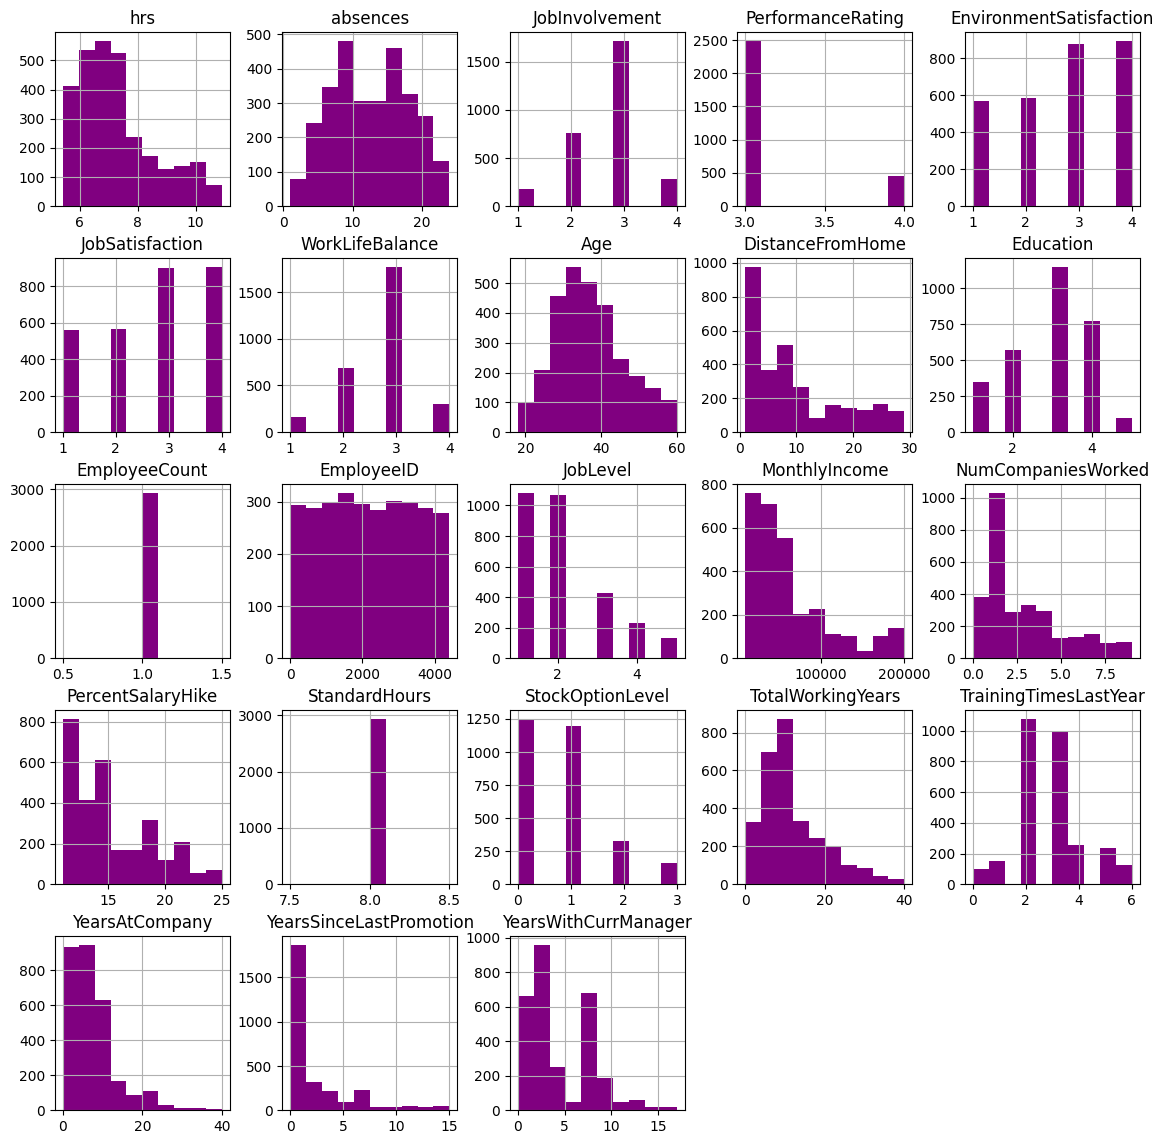

In [9]:
df.hist(figsize = (14, 14), color="purple")
plt.show()

Variables categóricas como PerformancingRating, StandardHours o EmployeeCount entre otras tienen baja cardinalidad. Mientras, variables numéricas como hrs, Age o Abscenses tienen mucha cardinalidad.

En la realización del EDA nos abstendremos de crear gráficas que definan la relación entre las diferentes variables con la variable objetivo, a su vez que prescindiremos de mapas de calor. Dado el problema que se nos presenta, nos limitaremos a eliminar variables constantes. En el caso de que se eliminasen variables semi-constantes sí necesitaríamos de este tipo de apoyos visuales, pero no es nuesto caso.

Para finalizar el EDA, sabemos que el problema que se nos presenta es de clasificación. Esto se debe a que la variable objetivo "Attrition" es una variable de tipo categórica. Esto también significa que deberemos codificarla para poder manipularla a lo largo de la práctica.

#Holdout y Realización de la Evaluación

A continuacion, realizaremos el preprocesamiento de nuestros datos para la creación de nuestro modelo de aprendizaje. Lo primero que hacemos es anclar la semilla de nuestro modelo. Emplearemos nuestro NIA como ID para definir la semilla de los procesos aleatorios que se encuentren a lo largo de la práctica, para emplear datos pseudoaleatorios reproducibles. Esto hará que en el caso de ejecutarse varias veces el código, este de el mismo resultado.

In [133]:
np.random.seed(100495773)

En este paso introducimos las variables de entrada en una variable "X", y las separamos de la variable objetivo, que introduciremos en una variable "y".

In [134]:
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

Información de las distribuciones de cada variable, indicando de forma numérica valores como la media o la desviación típica, por si necesitamos posteriormente datos de interés.

In [135]:
X.describe()

hrs    absences  JobInvolvement  PerformanceRating  \
count  2940.000000  2940.00000     2940.000000        2940.000000   
mean      7.307853    12.67517        2.719728           3.152721   
std       1.320261     5.53976        0.719877           0.359780   
min       5.416880     1.00000        1.000000           3.000000   
25%       6.280077     8.00000        2.000000           3.000000   
50%       7.022724    13.00000        3.000000           3.000000   
75%       7.888818    17.00000        3.000000           3.000000   
max      10.907255    24.00000        4.000000           4.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance          Age  \
count              2924.000000      2923.000000      2920.000000  2940.000000   
mean                  2.717510         2.735546         2.755822    36.973129   
std                   1.097171         1.093910         0.706477     9.180117   
min                   1.000000         1.000000         1.000000    18.000000   
25%                   2.000000         2.000000         2.000000    30.000000   
50%                   3.000000         3.000000         3.000000    36.000000   
75%                   4.000000         4.000000         3.000000    43.000000   
max                   4.000000         4.000000         4.000000    60.000000   

       DistanceFromHome    Education  ...  MonthlyIncome  NumCompaniesWorked  \
count       2940.000000  2940.000000  ...    2940.000000         2927.000000   
mean           9.342517     2.896599  ...   64211.180272            2.703792   
std            8.144996     1.028112  ...   46952.962747            2.475456   
min            1.000000     1.000000  ...   10090.000000            0.000000   
25%            2.000000     2.000000  ...   28575.000000            1.000000   
50%            7.000000     3.000000  ...   48050.000000            2.000000   
75%           14.000000     4.000000  ...   82370.000000            4.000000   
max           29.000000     5.000000  ...  199990.000000            9.000000   

       PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
count        2940.000000         2940.0       2940.000000        2934.000000   
mean           15.184694            8.0          0.796599          11.332993   
std             3.613927            0.0          0.847382           7.780129   
min            11.000000            8.0          0.000000           0.000000   
25%            12.000000            8.0          0.000000           6.000000   
50%            14.000000            8.0          1.000000          10.000000   
75%            18.000000            8.0          1.000000          15.000000   
max            25.000000            8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            2940.000000     2940.000000              2940.000000   
mean                2.801020        7.026531                 2.200680   
std                 1.280444        6.076240                 3.221736   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000       10.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  
count           2940.000000  
mean               4.193537  
std                3.590415  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000  

[8 rows x 23 columns]

Lo primero que haremos será eliminar las variables constantes o semi-constantes que no nos interesan, ya que no aportan nada al modelo. Debido a que queremos ser lo más cuidadosos posible, nos limiratemos a eliminar lo estrictamente necesario, en este caso las variables constantes. En el preproceso de los datos, las variables semi-constantes y con caracteres nulos serán preprocesadas con "scalers" e "imputers".

In [136]:
X.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1, inplace=True)

Vamos a separar el conjunto del dataframe en el conjunto de datos de testeo y de entrenamiento, para entrenar y evaluar a nuestros modelos a lo largo de la práctica. Dado que "Attrition", la variable objetivo, es categórica, la codificaremos. Para nuestro caso, los datos de testeo contarán con 1/3 de los datos del dataframe original, y los de entrenamiento con 2/3.

In [137]:
le = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=1/3, random_state=100495773)

y_test = le.fit_transform(y_test)
y_train = le.fit_transform (y_train)

Ahora, los pasos que seguiremos a continuación de este apartado consistirán en la evaluación inner del modelo. En esta crearemos de varios modelos basados en diferentes metodologías para procesar los datos de nuestro dataframe. En nuestro caso emplearemos 4: árboles de decisión, KNN, lineales (sin y con regularización L1), SVM. Los modelos serán entrenados con los valores de entreno, para posteriormente ser evaluados en base a los datos de precisión obtenidos en cada uno. Estos datos se verán representados con representaciones numéricas de los valores, matrices de confusión y curvas ROC. Para dichas evaluaciones será empleado el uso de "balanced_accuracy" como medidor de la precisión de los modelos, ya que nuestro modelo sufre un desbalanceo en los datos de la variable objetivo. De entre dichos modelos se escogerá el que mejor prediga los datos con los valores de testeo.

#Entrenamiento por Omisión (Árbol y KNN)

Para el preprocesado por Pipelines, dividiremos las variables de entrada en categóricas, o de tipo objeto, y numéricas.

In [305]:
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

A continuación, crearemos un entrenamiento basado tanto en árboles de decisión como KNN, con unos hiperparámetros elegidos por omisión. Este se empleará para probar cuales serán los hiperparámetros adecuados a utilizar en nuestro modelo final. Además servirá para observar la mejora entre ambos modelos, el caso base y el modelo mejorado.  

Para cada apartado en la creación de cada uno de los modelos se empleará un Pipeline. Un Pipeline permite encadenar varios pasos en el proceso de modelado, por lo que constituyen unidades estructuradas y reutilizables de código que pueden ser modificadas con facilidad. La división de los diferentes pasos del modelado en Pipelines nos permitirá cambiar los hiperparámetros de las diferentes partes con mayor rapidez. Eso nos servirá además para la búsqueda de hiperparámetros con los Search y para la creación de gráficas.

Lo primero que crearemos con Pipelines es el modelo 'dummy', la forma más básica de modelo. Esto se hace para poder emplearlo en la búsqueda de hiperparámetros posteriormente.

Para las variables categóricas, emplearemos un Pipeline basadon en los siguientes hiperparámetros:


*   Imputador: Sirve para rellenar los valores nulos. En el caso de nuestro modelo por omisión, se ha escogido que para cada variable que los posea se escoga como relleno el valor más frecuente.
*   Onehot: Codifica los datos categóricos en variables numéricas, para poder ser manipulados por los diferentes clasificadores.
*   PCA: Transforma los datos en un sistema de coordenadas con 'n' componentes, siendo 'n' la dimensionalidad del mismo. Para el dummy empleamos el mayor número posible de componentes, 25, para que en el caso por omisión dicho hiperparámetro no tenga efecto alguno visible.



In [306]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('pca', PCA(n_components=25, random_state=100495773))
])

In [307]:
cat_transformer[0]

SimpleImputer(strategy='most_frequent')

Para las variables numéricas, emplearemos un Pipeline basadon en los siguientes hiperparámetros:


*   Imputador: En el caso de las variables numéricas, se ha escogido que los valores nulos se rellenen con la media de los valores del resto de instancias para esa variable.
*   Scaler: Este hiperparámetro escala variables numéricas a un rango común. En nuestro caso hemos añadido Min Max Scaler, que escala los valores al rango [0, 1] en las variables.

In [308]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [309]:
num_transformer[0]

SimpleImputer(strategy='median')

A continuación, concatenamosel resultado del preprocesado de los valores categóricos junto al de los numéricos para emplearlos en la creación del modelo.

In [310]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [311]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalary...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('pca',
                                                  PCA(n_components=25,
                                                      random_state=100495773))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])

Para la creación del modelo necesitaremos definir un clasificador, que se encargará de procesar los datos y en base a ellos poder crear predicciones de la variable objetivo en base a variables de entrada independientes a los valores con los que el modelo ha sido entrenado. Ahora, crearemos un clasificador basado en árboles de decisión balanceados. El arbol realizará predicciones en base a preguntas binarias, cuyas respuestas son 0 o 1. A este se le ha añadido el hiperparámetro 'balanced' para dar pesos diferentes a las variables y corregir el desbalanceo original de nuestro problema. Finalmente, entrenaremos nuestro modelo pasándole los datos de entrenamiento.

In [312]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', tree.DecisionTreeClassifier(class_weight='balanced'))])

In [313]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

In [314]:
start_time = time.time()
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

In [315]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.2209 segundos


Al probar el entrenamiento de nuestro modelo inicial con árboles, obtenemos que dicho proceso ha durado en nuestro caso 0.22s, con su debidor margen de error. Con dicho margen me refiero que este tiempo puede variar dependiendo de la máquina en la que se ejecute el código o el estado actual de esta. Una misma máquina puede tardar más en realizar el mismo proceso si esta es sometida a una mayor carga de trabajo.

In [316]:
#Prediciones de nuestro modelo por omisión de Árbol
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo inicial de Árbol con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo inicial de Árbol con test: {accuracy_test}")

Precisión del modelo inicial de Árbol con train: 0.8592426622316671
Precisión del modelo inicial de Árbol con test: 0.7165450121654502


Sacamos las prediccionces tanto de los datos de salida que hemos empleado para entrenar el modelo como los de testeo. Observamos que la de entreno es bastante alta pero no lo suficiente, dado que si hemos entrenado el modelo con estos datos debería dar una cifra cercana a 1.0. En lo referente a la de testeo, el valor de precisión es bastante bajo.

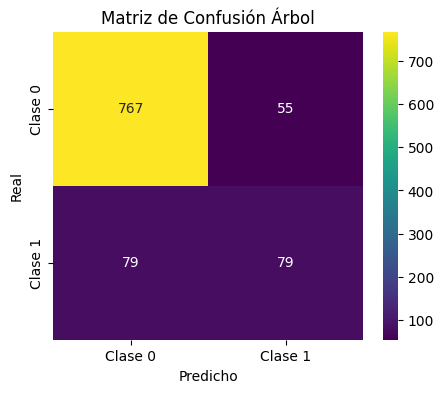

In [317]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Árbol')
plt.show()

Empleamos la matriz de confusión para ver las coinciencias entre las predicciones hechas y los datos reales. Observamos gracias a esta matrizque se detectan muchos falsos positivos y negativos.

Corregimos el desbalanceo del problema, con una comprobación con cross validation. Esta realiza una comprobación de la precisión de nuestro modelo en base a la media del empleo de cross validation en varias iteraciones. Es otro tipo de prueba que se puede tener en cuenta.

In [318]:
cross_val_score(clf, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

np.float64(0.6327448394164792)

A continuación, se realizarán los mismos pasos empleados para el modelo Árbol, pero en este caso para el modelo KNN. Un KNN, o K-Nearest Neighbors, es un algoritmo de clasificación basado en la proximidad. Basa la selección de sus predicciones en base a los K vecinos de una clase, seleccionándose los valores con mayor cardinalidad. Introduciremos nuestro clasificador KNN sin hiperparámetros definidos.

In [319]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', KNeighborsClassifier())])

In [320]:
start_time = time.time()
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [321]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.1873 segundos


Al probar el entrenamiento de nuestro modelo inicial con KNN, nos dá un tiempo mejor que el de árboles, de 0.18s con su debido margen de error. Podemos ver que el enrenamiento del KNN por omisión tiene menor coste computacional que el del árbol.

In [322]:
#Prediciones de nuestro modelo por omisión de KNN
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo inicial de KNN con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo inicial de KNN con test: {accuracy_test}")

Precisión del modelo inicial de KNN con train: 0.7061889802580923
Precisión del modelo inicial de KNN con test: 0.5930040962148511


En comparación con el modelo con árboles, este modelo ofrece valores más bajos. Esto quiere decir que mayor coste computacional ofrece un mejor rendimiento del modelo, en principio.

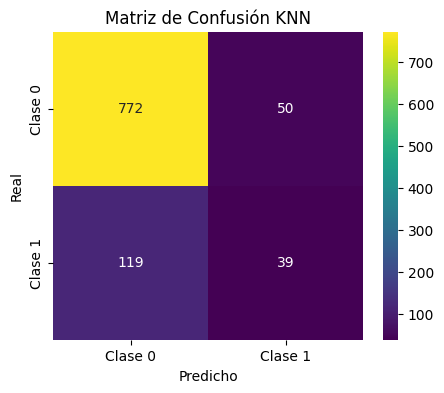

In [323]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión KNN')
plt.show()

Observamos gracias a la matriz de confusión que se detectan bastantes falsos positivos respecto a falsos negativos.

Corregimos el desbalanceo del problema, con una comprobación con cross validation.

In [324]:
cross_val_score(clf, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

np.float64(0.5888357977899688)

#Búsqueda HPO (Árbol y KNN)

Ahora buscamos los mejores hiperparámetros para el problema. Para los hiperparámetros numéricos se tendrán en cuenta los siguientes tres métodos de escalado (minmax, standard, robust) y dos de imputación (media y mediana). En la imputación de los valores categóricos, al no ser numéricos, reemplazaremos dichos métodos por otros adecuados a esos tipos de datos (most frequent, constant).

Buscaremos los hiperparámetros con Randomizar Search tanto usando Árboles de Decisión como KNN, para comprobar cuál es mejor método y cuáles son sus mejores hiperparámetros. El empleo de Randomizer Search se debe a su bajo coste computacional y temporal, ya que busca los mejores hiperparámetros de forma aleatoria en un espacio definido. A este se le ha añadido los parámetros:

*   Cross Validation: (CV=5) Divide el conjunto de datos en varias particiones y prueba la precisión de los hiperparámetros del modelo para cada uno de ellos.
*   Random State: Para generar reproducibilidad de los datos.
*   N Jobs: (n_jobs=-1) Emplea los procesadores definidos en el parámetro para la búsqueda de hiperparámetros, siendo -1 el valor que indica todos los procesadores de los que disponga la máquina en la que se está ejecutando (en el caso de Google Colab es 2).



In [50]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', tree.DecisionTreeClassifier(class_weight='balanced'))])

Como podemos ver, el haber definido las diferentes partes de la creación del modelo con identificadores nos sirve ahora para definir los posibles hiperparámetros que queremos probar para cada paso: para el preproceso de variables categóricas, para el de las numéricas y para el clasificador.

In [51]:
num_transformer_dist = {'preprocessor__num__imputer': [KNNImputer(n_neighbors=n) for n in range(3, 8)] +
                                                      [SimpleImputer(strategy=s) for s in ['mean', 'median']],
                        'preprocessor__num__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()]}

cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__pca__n_components': list(range(5, 15))}

decission_tree_dist = {'classifier__max_depth': list(range(5, 25)),
                      'classifier__min_samples_split': list(range(2, 10)),
                      'classifier__min_samples_leaf': list(range(1, 10))}

param_dist = {**num_transformer_dist, **cat_transformer_dist, **decission_tree_dist}

random_search_tree = RandomizedSearchCV(clf,
                                   param_distributions=param_dist,
                                   n_iter=150,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=100495773,
                                   scoring='balanced_accuracy')

In [52]:
random_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Educati...
                                                                                 10,
                                                                                 11,
                                                                                 12,
                                                                                 13,
                                                                                 14],
                                        'preprocessor__num__imputer': [KNNImputer(n_neighbors=3),
                                                                       KNNImputer(n_neighbors=4),
                                                                       KNNImputer(),
                                                                       KNNImputer(n_neighbors=6),
                                                                       KNNImputer(n_neighbors=7),
                                                                       SimpleImputer(),
                                                                       SimpleImputer(strategy='median')],
                                        'preprocessor__num__scaler': [MinMaxScaler(),
                                                                      StandardScaler(),
                                                                      RobustScaler()]},
                   random_state=100495773, scoring='balanced_accuracy',
                   verbose=2)

La búsqueda de hiperparámetros para el Árbol ha tardado más de 1 minuto en completarse.

In [53]:
random_search_tree.best_score_

np.float64(0.798428953941895)

In [54]:
random_search_tree.best_params_

{'preprocessor__num__scaler': MinMaxScaler(),
 'preprocessor__num__imputer': KNNImputer(n_neighbors=3),
 'preprocessor__cat__pca__n_components': 9,
 'preprocessor__cat__imputer__strategy': 'constant',
 'classifier__min_samples_split': 3,
 'classifier__min_samples_leaf': 1,
 'classifier__max_depth': 23}

Aquí tenemos la precisión calculada que tendrá el modelo mejorado de árbol en base al cross-validation empleado, y los hiperparámetros para este mismo modelo.

Ahora reajustamos el modelo por omisión para que detecte el método KNN, y que busque también con Randomizer Search sus mejore hiperparámetros.

In [55]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', KNeighborsClassifier())])

In [56]:
num_transformer_dist = {'preprocessor__num__imputer': [KNNImputer(n_neighbors=n) for n in range(3, 8)] +
                                                      [SimpleImputer(strategy=s) for s in ['mean', 'median']],
                        'preprocessor__num__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()]}

cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__pca__n_components': list(range(5, 15))}

knn_dist = {'classifier__n_neighbors': range(2, 15),
                 'classifier__weights': ['uniform', 'distance']}

param_dist = {**num_transformer_dist, **cat_transformer_dist, **knn_dist}

random_search_KNN = RandomizedSearchCV(clf,
                                   param_distributions=param_dist,
                                   n_iter=150,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=100495773,
                                   scoring='balanced_accuracy')

In [57]:
random_search_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Educati...
                                                                                 10,
                                                                                 11,
                                                                                 12,
                                                                                 13,
                                                                                 14],
                                        'preprocessor__num__imputer': [KNNImputer(n_neighbors=3),
                                                                       KNNImputer(n_neighbors=4),
                                                                       KNNImputer(),
                                                                       KNNImputer(n_neighbors=6),
                                                                       KNNImputer(n_neighbors=7),
                                                                       SimpleImputer(),
                                                                       SimpleImputer(strategy='median')],
                                        'preprocessor__num__scaler': [MinMaxScaler(),
                                                                      StandardScaler(),
                                                                      RobustScaler()]},
                   random_state=100495773, scoring='balanced_accuracy',
                   verbose=2)

La búsqueda ha tardado 44 segundos en completarse esta vez para KNN.

In [58]:
random_search_KNN.best_score_

np.float64(0.7995743573982093)

In [59]:
random_search_KNN.best_params_

{'preprocessor__num__scaler': StandardScaler(),
 'preprocessor__num__imputer': KNNImputer(n_neighbors=7),
 'preprocessor__cat__pca__n_components': 13,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'classifier__weights': 'distance',
 'classifier__n_neighbors': 2}

Aquí tenemos la precisión esperada y los hiperparámetros para el método con KNN.

#Entrenamiento Métodos Básicos (Árbol y KNN)

En este apartado realizaremos las mismas acciones que en la creación del modelo inicial, pero cambiando los hiperparámetros debidos en cada fase del preprocesado.

Compararemos los resultados de ambos modelos finales, los del árbol y los del KNN. La creación del preprocesamiento y del clasificador por Pipelines es similar a la del caso por omisión, pero en este caso se cambiarán los debidos hiperparámetros.

In [325]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('pca', PCA(n_components=9))
])

In [326]:
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', MinMaxScaler())
])

In [327]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [328]:
clf_tree = Pipeline(steps=[('preprocessor', preprocessor_tree),
              ('classifier', tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=3, max_depth=23,
                                                         min_samples_leaf=1))])

In [329]:
start_time = time.time()
clf_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompan...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=9))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=23,
                                        min_samples_split=3))])

In [330]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.4796 segundos


Se nos muestra que el tiempo de entreno es de 0.47, bastante superior al del modelo por omisión, con su debido margen de error.

In [331]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('pca', PCA(n_components=13))
])

In [332]:
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', StandardScaler())
])

In [333]:
preprocessor_KNN = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [334]:
clf_KNN = Pipeline(steps=[('preprocessor', preprocessor_KNN),
                      ('classifier', KNeighborsClassifier(n_neighbors=2, weights='distance'))])

In [335]:
start_time = time.time()
clf_KNN.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumComp...
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=13))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

In [336]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.3621 segundos


Se nos muestra que el tiempo de entrenamiento ha sido ligéramente inferior al del entreno de árboles, con 0.36s y su debido margen de error.

In [337]:
#Predicciones de nuestro modelo con árboles
y_pred_train_tree = random_search_tree.predict(X_train)
y_pred_test_tree = clf_tree.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train_tree)
print(f"Precisión del modelo Árboles con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test_tree)
print(f"Precisión del modelo Árboles con test: {accuracy_test}")

print("---------------------------------------------------------")

#Predicciones de nuestro modelo con KNN
y_pred_train_KNN = clf_KNN.predict(X_train)
y_pred_test_KNN = clf_KNN.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train_KNN)
print(f"Precisión del modelo KNN con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test_KNN)
print(f"Precisión del modelo KNN con test: {accuracy_test}")

Precisión del modelo Árboles con train: 0.9993917274939172
Precisión del modelo Árboles con test: 0.8403246173272968
---------------------------------------------------------
Precisión del modelo KNN con train: 1.0
Precisión del modelo KNN con test: 0.8585804921617542


Dadas las nuevas predicciones ofrecidas podemos observar que, aunque ahora el modelo con KNN tiene un mayor coste computacional, su precisión es mejor que la del árbol, obteniendo una precisión perfecta con los datos con los que ha sido entrenado. En comparación, el de árbol no ha sido capáz de predecir todas las salidas con las que ha sido entrenado.

Aqui presentaremos la matriz de confusión que define de forma gráfica las predicciones de cada uno de los modelos.

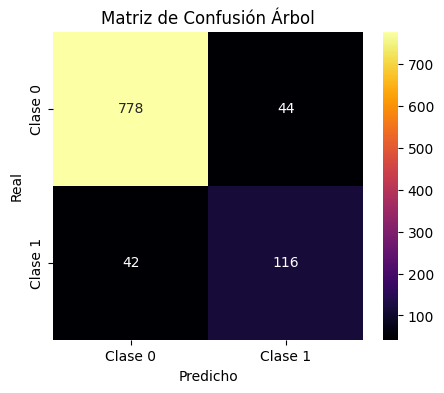

In [338]:
cm = confusion_matrix(y_test, y_pred_test_tree, labels=random_search_tree.classes_)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Árbol')
plt.show()

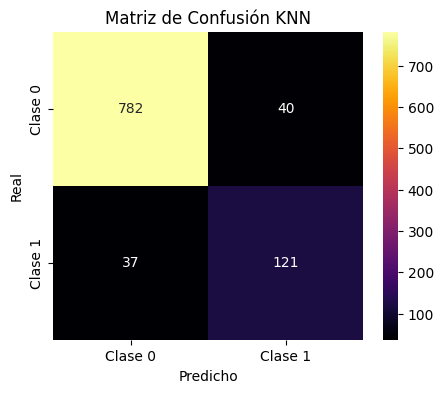

In [339]:
cm = confusion_matrix(y_test, y_pred_test_KNN, labels=random_search_KNN.classes_)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión KNN')
plt.show()

Podemos observar que el modelo de árbol detecta bastantes falsos negativos. Aun así, se puede decir que ambos modelos funcionan mejor que sus homólogos por omisión.

Corregimos el desbalanceo para ambos problemas, con una comprobación con cross validation.

In [340]:
cross_val_score(clf_tree, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

np.float64(0.7941906496857521)

In [341]:
cross_val_score(clf_KNN, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

np.float64(0.7995743573982093)

Ahora veremos de forma gráfica la curva ROC, otro método de comprobación útil para ver las variables predichas correctamente respecto a las que no lo han sido.

In [342]:
probs = random_search_tree.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='purple', label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')
plt.title('Curva ROC Árbol', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

In [343]:
probs = random_search_KNN.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='purple', label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')
plt.title('Curva ROC KNN', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

Gracias a estas comprobaciones realizadas con matrices de confusión, cross validation y curvas ROC, podemos observar las diferentes ventajas y desventajas de cada uno de los modelos. Respecto a los modelos originales, estos valores han mejorado significativamente. Respecto el uno del otro, mientras que el de Árbol es menos propenso a encontrar falsos positivos y negativos, los valores de precisión de KNN de entreno y testeo se acercan más entre sí que los del Árbol.

Vamos a ver de forma gráfica el desempeño que realiza en la precisión del entrenamiento los hiperparámetros del arbol clasificador: min_sample_split, max_depth y min_samples_leaf.

El hiperparámetro min_sample_slpit define el número mínimo de muestras necesarias para dividir un nodo en un árbol, haciendo que la muestra de datos sobre la que se evalúen preguntas binarias sea lo suficientemente grande.

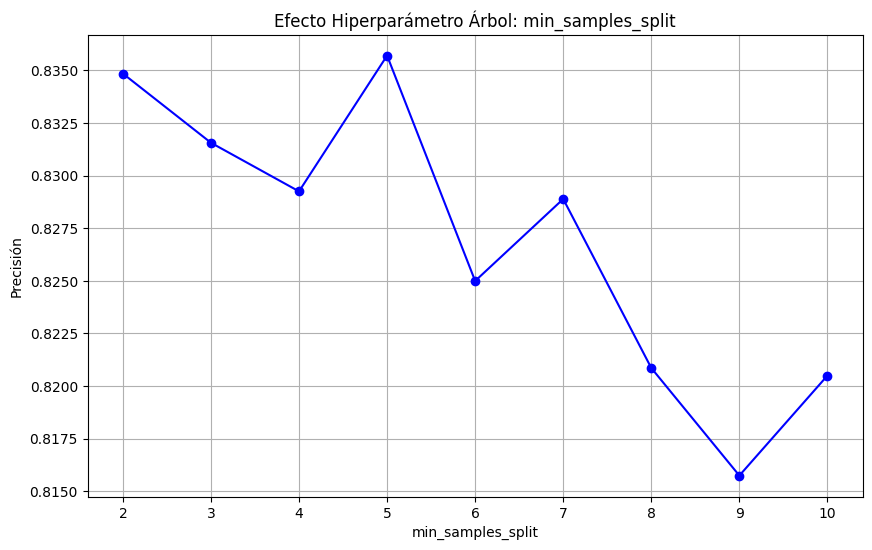

In [344]:
# Lista de valores para min_samples_split
min_samples_split_values = range(2, 11)
accuracy_values_tree = []

for min_samples_split in min_samples_split_values:
    clf_tree = Pipeline(steps=[('preprocessor', preprocessor_tree),
                      ('classifier', tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=min_samples_split, max_depth=23,
                                                                 min_samples_leaf=1))])
    clf_tree.fit(X_train, y_train)
    y_pred = clf_tree.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_tree.append(accuracy)

# Graficar el efecto de min_samples_split sobre la precisión
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, accuracy_values_tree, marker='o', linestyle='-', color='b')
plt.title('Efecto Hiperparámetro Árbol: min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

El hiperparámetro max_depth define la máxima profundidad del árbol generado, haciendo que el problema sea acotado y que no se produzcan ramificaciones redundantes.

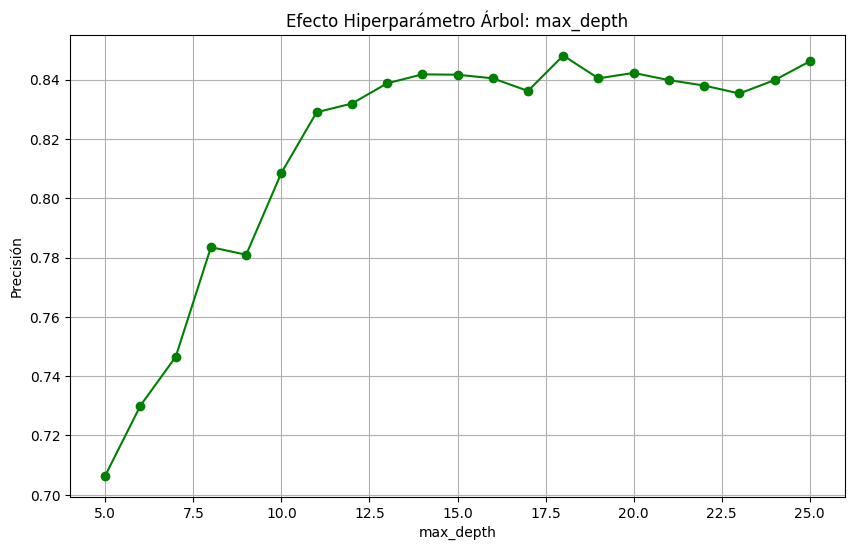

In [345]:
# Lista de valores para max_depth
max_depth_values = range(5, 26)
accuracy_values_tree = []

for max_depth in max_depth_values:
    clf_tree = Pipeline(steps=[('preprocessor', preprocessor_tree),
                      ('classifier', tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=3, max_depth=max_depth,
                                                                 min_samples_leaf=1))])
    clf_tree.fit(X_train, y_train)
    y_pred = clf_tree.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_tree.append(accuracy)

# Graficar el efecto de max_depth sobre la precisión
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_values_tree, marker='o', linestyle='-', color='g')
plt.title('Efecto Hiperparámetro Árbol: max_depth')
plt.xlabel('max_depth')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

El hiperparámetro min_samples_leaf define el número mínimo que debe haber al alcanzarse un nodo hoja, con el fin de reducir el sobreajuste del modelo.

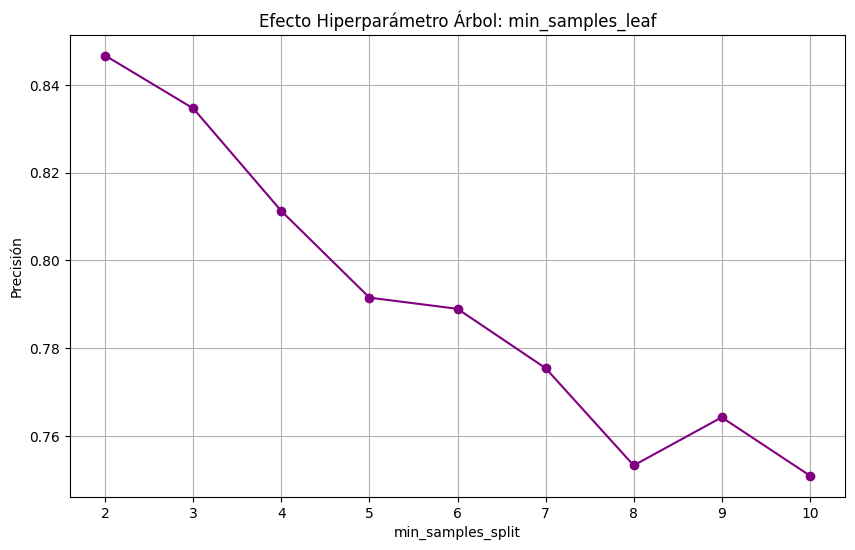

In [346]:
# Lista de valores para min_samples_leaf
min_samples_leaf_values = range(1, 10)
accuracy_values_tree = []

for min_samples_leaf in min_samples_leaf_values:
    clf_tree = Pipeline(steps=[('preprocessor', preprocessor_tree),
                      ('classifier', tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=3, max_depth=23,
                                                                 min_samples_leaf=min_samples_leaf))])
    clf_tree.fit(X_train, y_train)
    y_pred = clf_tree.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_tree.append(accuracy)

# Graficar el efecto de min_samples_leaf sobre la precisión
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, accuracy_values_tree, marker='o', linestyle='-', color='purple')
plt.title('Efecto Hiperparámetro Árbol: min_samples_leaf')
plt.xlabel('min_samples_split')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

Retornamos el modelo a sus valores dados por el buscador de HPO.

In [347]:
clf_tree = Pipeline(steps=[('preprocessor', preprocessor_tree),
                           ('classifier', tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=3, max_depth=23,
                                                                      min_samples_leaf=1))])
clf_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompan...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=9))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=23,
                                        min_samples_split=3))])

Vamos a ver de forma gráfica la precisión de los hiperparámetros del KNN: n_neighbors y weights.

El hiperparámetro n_neighbors define el número de k neighbors, para hacer al modelo menos sensible al ruido sin que sobreaprenda.

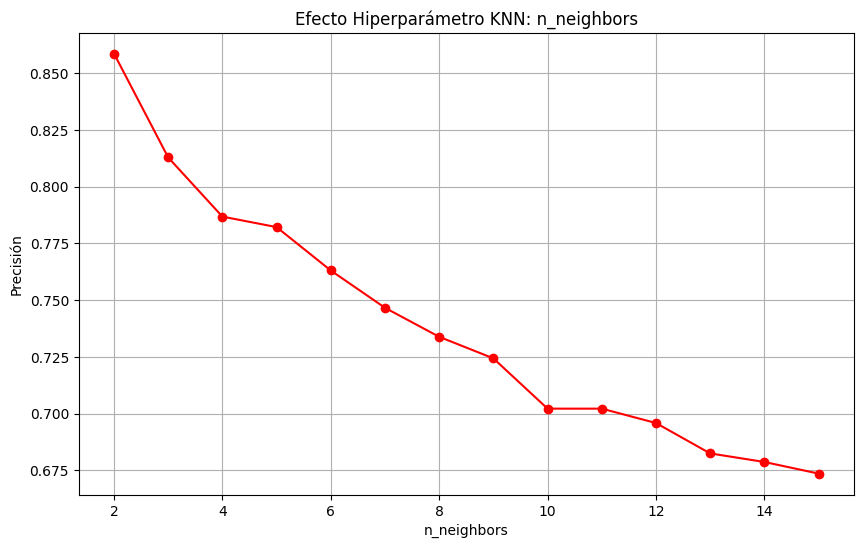

In [348]:
# Lista de valores para n_niehgbors
n_neighbors_values = range(2, 16)
accuracy_values_KNN = []

for n_neighbors in n_neighbors_values:
    clf_KNN = Pipeline(steps=[('preprocessor', preprocessor_KNN),
                          ('classifier', KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance'))])
    clf_KNN.fit(X_train, y_train)
    y_pred = clf_KNN.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_KNN.append(accuracy)

# Graficar el efecto de n_neighbors sobre la precisión
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracy_values_KNN, marker='o', linestyle='-', color='r')
plt.title('Efecto Hiperparámetro KNN: n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

El hiperparámetro weights determina cómo se ponderan los neighbors en el algoritmo. Dado que en el modelo mejorado escogimos 'distance', este provocará que los más cercanos tengan mayor peso.

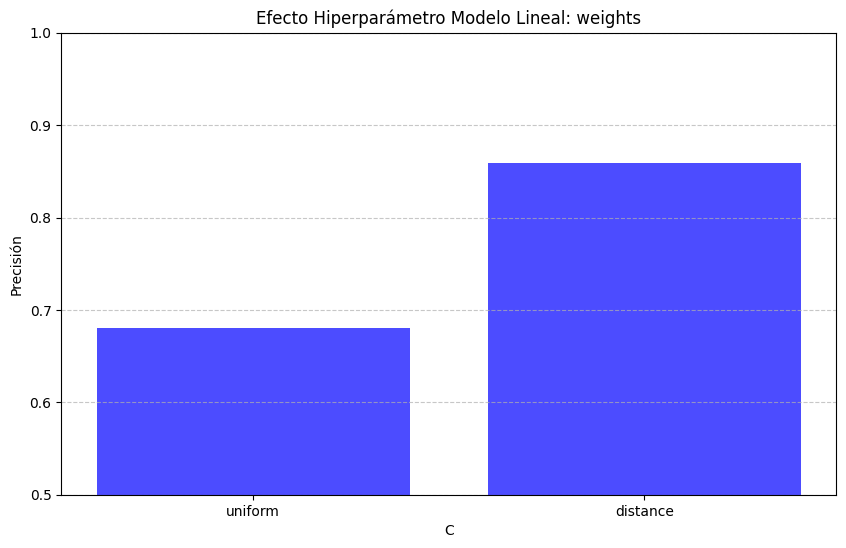

In [349]:
# Lista de valores para n_niehgbors
weights_values = ['uniform', 'distance']
accuracy_values_KNN = []

for weights in weights_values:
    clf_KNN = Pipeline(steps=[('preprocessor', preprocessor_KNN),
                          ('classifier', KNeighborsClassifier(n_neighbors=2, weights=weights))])
    clf_KNN.fit(X_train, y_train)
    y_pred = clf_KNN.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_KNN.append(accuracy)

# Graficar el efecto de weights sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar([str(weights) for weights in weights_values], accuracy_values_KNN, color='blue', alpha=0.7)
plt.title('Efecto Hiperparámetro Modelo Lineal: weights')
plt.xlabel('C')
plt.ylabel('Precisión')
plt.ylim(0.5, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Retornamos los valores de n_neighbors a los dados por HPO.

In [350]:
clf_KNN = Pipeline(steps=[('preprocessor', preprocessor_KNN),
                          ('classifier', KNeighborsClassifier(n_neighbors=2, weights='distance', leaf_size=25))])
clf_KNN.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumComp...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=13))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 KNeighborsClassifier(leaf_size=25, n_neighbors=2,
                                      weights='distance'))])

Como podemos observar en las gráficas anteriores, los valores mostrados en estas concuerden con los ofrecidos por Randomizer Search en el apartado de búsqueda de hiperparámetros.
En el caso de "max_depth" esto no ocurre, pero probablemente se deba a que el método de búsqueda de hiperparámetros ha considerado oportuno dicha cifra. Probablemente, cifras superiores habrían contribuido a volver más sensible al modelo ante el ruid.

Como conclusiones, los resultados ofrecidos por los modelos de KNN y Árboles han mejorado respecto a los de sus respectivos modelos originales. Los tiempos de ejecución del entreno han varíado ligeramente de uno a otro modelo, pero dadas las mejoras ofrecidas el coste computacional extra es pertinente.

Por último, vamos a comparar los resultados de nuestro modelo con el de otros tipos como el trivial, naive o dummy.

In [351]:
#Prediciones de nuestro modelo Árbol
y_pred = clf_tree.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred)
print(f"Precisión del modelo Árbol con train: {accuracy}")

y_pred = clf_tree.predict(X_test)

accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Árbol con test: {accuracy}")

#Prediciones de nuestro modelo KNN
y_pred = clf_KNN.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred)
print(f"Precisión del modelo KNN con train: {accuracy}")

y_pred = clf_KNN.predict(X_test)

accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN con test: {accuracy}")

print("-------------------------------------------------------")

#Predicciones modelo trivial
dummy_clf = DummyClassifier(strategy='most_frequent')

dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred)
print(f"Precisión del modelo trivial (clase mayoritaria) con train: {accuracy}")

y_pred = dummy_clf.predict(X_test)

accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Precisión del modelo trivial (clase mayoritaria) con test: {accuracy}")

#Predicciones modelo naive
#(Se deben preprocesar los datos para elmiminar los valores nulos y convertir las variables categóricas a numéricas)
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns
nb_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder())
])
nb_num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant'))
])
nb_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', nb_cat_transformer, cat_cols),
        ('num', nb_num_transformer, num_cols)
])
nb_clf = Pipeline(steps=[
    ('preprocessor', nb_preprocessor),
    ('classifier', GaussianNB())
])
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred)
print(f"Precisión del modelo Naive Bayes con train: {accuracy}")


y_pred = nb_clf.predict(X_test)

accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naive Bayes con test: {accuracy}")


#Predicciones modelo dummy
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred)
print(f"Precisión del modelo Dummy (aleatorio) con train: {accuracy}")

y_pred = dummy_clf.predict(X_test)

accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Dummy (aleatorio) con test: {accuracy}")

Precisión del modelo Árbol con train: 0.9993917274939172
Precisión del modelo Árbol con test: 0.832170685884998
Precisión del modelo KNN con train: 1.0
Precisión del modelo KNN con test: 0.8585804921617542
-------------------------------------------------------
Precisión del modelo trivial (clase mayoritaria) con train: 0.5
Precisión del modelo trivial (clase mayoritaria) con test: 0.5
Precisión del modelo Naive Bayes con train: 0.5887346391943085
Precisión del modelo Naive Bayes con test: 0.5676799408666728
Precisión del modelo Dummy (aleatorio) con train: 0.5096168653176877
Precisión del modelo Dummy (aleatorio) con test: 0.5450352644060488


Como podemos ver, las predicciones de los otros tipos de modelos son inferiores respecto a las realizadas por nuestros modelo tanto de Árbol como de KNN. Dado que son modelos bastante pobres, sus predicciones fallan tanto con las variables con las que ha sido entrenado el modelo como con las de testeo.

#Entrenamiento por Omisión (Modelos Lineales y SVM's)

A continuación, crearemos un entrenamiento basado tanto en modelos lineales como en SVM's, con hiperparámetros por omisión, como el realizado anteriormente para Árboles y KNN.

Lo primero que realizaremos será recuperar los valores del preprocesamiento de los datos. Para ello emplearemos el código empleado en los primeros casos. Dado que los hiperparámetros del preproceso no deberían ser determinantes para este tipo de métodos de modelaje, emplearemos los del caso por omisión.

In [410]:
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

In [411]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('pca', PCA(n_components=25, random_state=100495773))
])

In [412]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [413]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

Ahora realizaremos la creación del modelo por omisión para el Modelo Lineal. Serán evaluados tanto el modelo lineal sin regularización y con regularización L1. (El método l1 va ligado al método "liblinear" del hiperparámetro solver.) Los modelos lineales predicen las variables de salida como combinaciones lineales de las variables de entrada. Se supone que este tipo de modelos está preparado para resolver problemas de regresión, y no de modificación. Los diferentes tipos de regularización buscan evitar el sobreaajuste en el modelo. Estos son los diferentes tipos:



*   None: Sin regularización
*   L1: Regularización Lasso o suma de valores absolutos
*   L2: Regularización Ridge o suma de cuadrados
*   Elasticnet: Combinación entre L1 y L2



Modelo Lineal sin regularización.

In [414]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state=100495773))])

In [415]:
start_time = time.time()
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(penalty=None, random_state=100495773))])

In [416]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.1925 segundos


El modelo por omisión del modelo lineal sin regularización ha tardado 0,19s, con su margen de error.

Vamos a evaluar la precisión de este modelo.

In [417]:
#Prediciones de nuestro modelo por omisión lineal sin regularización
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo inicial de Árbol con train: {accuracy_train}")

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo inicial de Árbol con test: {accuracy_test}")

Precisión del modelo inicial de Árbol con train: 0.8581632653061224
Precisión del modelo inicial de Árbol con test: 0.8479591836734693


Ahora veremos los resultados de evaluación ofrecidos tanto por la matriz de confusión como por cross validation.

In [418]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Modelo Lineal (none)')
plt.show()

Corregimos el desbalanceo del problema, con una comprobación con cross validation.

In [419]:
cv = KFold(n_splits=5, shuffle=True, random_state=100495773)
cross_val_score(clf, X_train, y_train, cv=cv, scoring="balanced_accuracy").mean()

np.float64(0.6225251843061547)

Modelo Lineal con regularización L1.

In [420]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1', solver='liblinear', random_state=100495773))])

In [421]:
start_time = time.time()
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(penalty='l1', random_state=100495773,
                                    solver='liblinear'))])

In [422]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.2214 segundos


El modelo por omisión del modelo lineal con regularización L1 ha tardado ligéramente más que el no regulado, 0,22s con su margen de error.

Vamos a evaluar la precisión de este modelo.

In [423]:
#Prediciones de nuestro modelo por omisión lineal con regularización L1
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo inicial de Árbol con train: {accuracy_train}")

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo inicial de Árbol con test: {accuracy_test}")

Precisión del modelo inicial de Árbol con train: 0.863265306122449
Precisión del modelo inicial de Árbol con test: 0.860204081632653


Ahora veremos los resultados de evaluación ofrecidos tanto por la matriz de confusión como por cross validation.

In [424]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Modelo Lineal (L1)')
plt.show()

Corregimos el desbalanceo del problema, con una comprobación con cross validation.

In [425]:
cv = KFold(n_splits=5, shuffle=True, random_state=100495773)
cross_val_score(clf, X_train, y_train, cv=cv, scoring="balanced_accuracy").mean()

np.float64(0.6061762216870984)

Ahora realizaremos la creación del modelo por omisión para el modelo SVM's. Los modelos SVM's, o Support Vector Machine, intentan buscar en un hiperplano, superficie de 2D, la mejor frontera que separa las clases en los datos. Para ello emplea pseudométodos que permiten buscar dicha frontera a un bajo coste computacional, llamados kernel tricks o el hiperparámetro 'kernel'. Los más destacales son:

*   Lineal: Para datos que son linealmente separables
*   RBF: Gaussiano o radial. Para separar curvas y patrones complejos.
*   Otros: Sigmodial, Polinomial, etc.



In [426]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear', random_state=100495773))])

In [427]:
start_time = time.time()
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier', SVC(kernel='linear', random_state=100495773))])

In [428]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.3086 segundos


El modelo por omisión de SVM's ha tardado ligeramente más que los modelos lineales, 0,30s con su margen de error.

Vamos a evaluar la precisión de este modelo.

In [429]:
#Prediciones de nuestro modelo por omisión SVM's
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo inicial de Árbol con train: {accuracy_train}")

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo inicial de Árbol con test: {accuracy_test}")

Precisión del modelo inicial de Árbol con train: 0.8387755102040816
Precisión del modelo inicial de Árbol con test: 0.8387755102040816


Ahora veremos los resultados de evaluación ofrecidos tanto por la matriz de confusión como por cross validation.

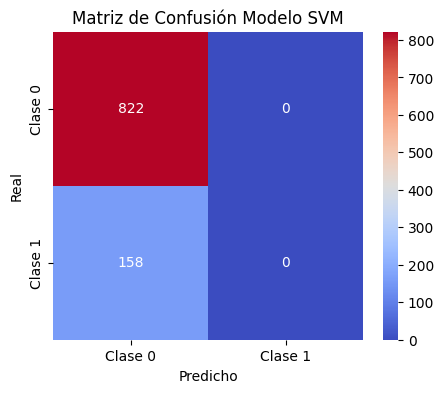

In [430]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Modelo SVM')
plt.show()

In [431]:
cv = KFold(n_splits=5, shuffle=True, random_state=100495773)
cross_val_score(clf, X_train, y_train, cv=cv, scoring="balanced_accuracy").mean()

np.float64(0.5328969635136909)

Como podemos observar en las evaluaciones ofrecidas, los casos de los modelos lineales funcionan mejor que el SVM's base. En lo referido a los lineales, el sin regular base funciona mejor que el regulado con L1, aunque para el no regulado la precisión de los valores de train sea inferior a la de los de test. En lo referido al SVM's, este no detecta ninguna clase de positivos. Solo detecta negativos. Esto sumado a que es el método que más gasto computacional tiene lo convierte en el peor método por ahora.

#Búsqueda HPO (Modelos Lineales y SVM's)

Ahora realizaremos las mismas operaciones realizadas sobre los modelos de árboles de decisión y KNN, solo que esta vez con dos nuevos tipos de modelos más avanzados: Modelos Lineales y SVM's. Para la realización de la búsqueda de hiperparámetros de estos modelos, usaremos Grid Search con un valor en cross-validation de 3. Grid Search es un método de búsqueda de hiperparámetros que comprueba todas las combinaciones posibles entre los hiperparámetros dados, con el fin de encontrar la mejor combinación posible.

Primero, crearemos el caso base del Modelo Lineal y la búsqueda de sus hiperparámetros. Para este tipo de método de modelaje, consideraremos en el hiperparámetro penalty ambos modelos presentados anteriormente, además de otros de cierta importancia.

In [103]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state=100495773))])

In [104]:
param_grid = [{'classifier__penalty': ['l1', 'l2', 'elasticnet'],
                    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

inner = KFold(n_splits=3, shuffle=True, random_state=100495773)

grid_search_linear = GridSearchCV(estimator = clf,
                    param_grid = param_grid,
                    scoring='balanced_accuracy',
                    cv=inner,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

In [105]:
grid_search_linear.fit(X_train, y_train)

Fitting 3 folds for each of 105 candidates, totalling 315 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
168 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **

GridSearchCV(cv=KFold(n_splits=3, random_state=100495773, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'Work...
       'MaritalStatus'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(penalty=None,
                                                           random_state=100495773))]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__penalty': ['l1', 'l2', 'elasticnet'],
                          'classifier__solver': ['newton-cg', 'lbfgs',
                                                 'liblinear', 'sag', 'saga']}],
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

 La búsqueda ha tardado 23 segundos para el Modelo Lineal.

In [106]:
grid_search_linear.best_score_

np.float64(0.6225563296416582)

In [107]:
grid_search_linear.best_params_

{'classifier__C': 100,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

Estos son los hipierparámetros del Modelo Lineal. Como podemos observar, el Randomizer Search ha considerado mejor opción el Modelo Lineal con Regularización L1 sobre el que no la tiene.

A continuación, realizaremos las mismas acciones pero en este caso para el método SVM's (Support Vector Machine).

In [108]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear', random_state=100495773))])

In [109]:
param_grid = [{'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]}]

grid_search_SVM = GridSearchCV(estimator = clf,
                    param_grid = param_grid,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

In [110]:
grid_search_SVM.fit(X_train, y_train)

Fitting 3 folds for each of 196 candidates, totalling 588 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'J...
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                                       ('classifier',
                                        SVC(kernel='linear',
                                            random_state=100495773))]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                                0.1, 1, 10],
                          'classifier__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid']}],
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

La búsqueda ha tardado 5 minutos para el modelo SVM's, muchísimo más que en el modelo lineal.

In [111]:
grid_search_SVM.best_score_

np.float64(0.7801774756636345)

In [112]:
grid_search_SVM.best_params_

{'classifier__C': 1000,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'rbf'}

Aquí tenemos los hiperparámetros para el método SVM's (SVC). Como podemos observar, aunque el coste comuptacional para sacar dichos hiperparámetros es muy alto, debemos comprobar si merece la pena el coste computacional que ha supuesto.

#Entrenamiento Modelos Avanzados (Modelos Lineales y SVM's)

Ahora añadiremos los hiperparámetros dados para cada uno de los diferentes métodos a sus modelos mejorados.

In [391]:
clf_linear = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(C=100, penalty='l1', solver='saga', random_state=100495773))])

In [392]:
start_time = time.time()
clf_linear.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=100, penalty='l1', random_state=100495773,
                                    solver='saga'))])

In [393]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.4012 segundos


El modelo lineal ha tardado 0.40s en ser entrenado, con su margen de error.

In [394]:
clf_SVM = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(C=1000, gamma='auto', kernel='rbf', random_state=100495773))])

In [395]:
start_time = time.time()
clf_SVM.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 SVC(C=1000, gamma='auto', random_state=100495773))])

In [396]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 0.5333 segundos


El modelo SVM ha tardado 0.53s en ser entrenado, con su margen de error, bastante más que el modelo lineal.

Ahora imprimimos por pantalla sus respectivos valores de precisión.

In [397]:
#Predicciones de nuestro modelo lineal
y_pred_train = clf_linear.predict(X_train)
y_pred_test_linear = clf_linear.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo Lineal con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test_linear)
print(f"Precisión del modelo Lineal con test: {accuracy_test}")

print("---------------------------------------------------------")

#Predicciones de nuestro modelo SVM's
y_pred_train = clf_SVM.predict(X_train)
y_pred_test_SVM = clf_SVM.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo SVM's con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test_SVM)
print(f"Precisión del modelo SVM's con test: {accuracy_test}")

Precisión del modelo Lineal con train: 0.6317025470448736
Precisión del modelo Lineal con test: 0.6128383997043334
---------------------------------------------------------
Precisión del modelo SVM's con train: 0.9968354430379747
Precisión del modelo SVM's con test: 0.875858511195294


También imprimimos sus matrices de confusión.

In [398]:
cm = confusion_matrix(y_test, y_pred_test_linear)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Modelo Lineal')
plt.show()

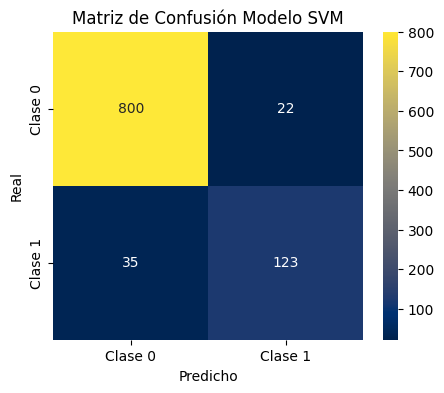

In [399]:
cm = confusion_matrix(y_test, y_pred_test_SVM)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Modelo SVM')
plt.show()

Corregimos el desbalanceo de ambos modelos, con una comprobación con cross validation.

In [400]:
cross_val_score(clf_linear, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


np.float64(0.6128875457162626)

In [401]:
cross_val_score(clf_SVM, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

np.float64(0.8061810652301051)

Representamos para cada uno de ellos la curva ROC.

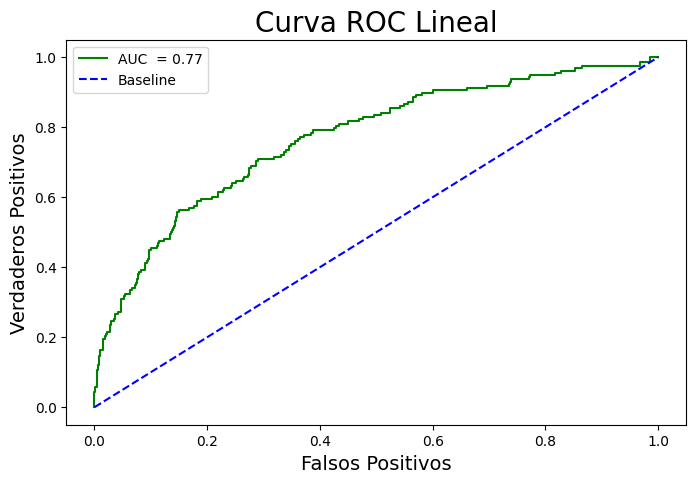

In [402]:
probs = clf_linear.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='green', label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC Lineal', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

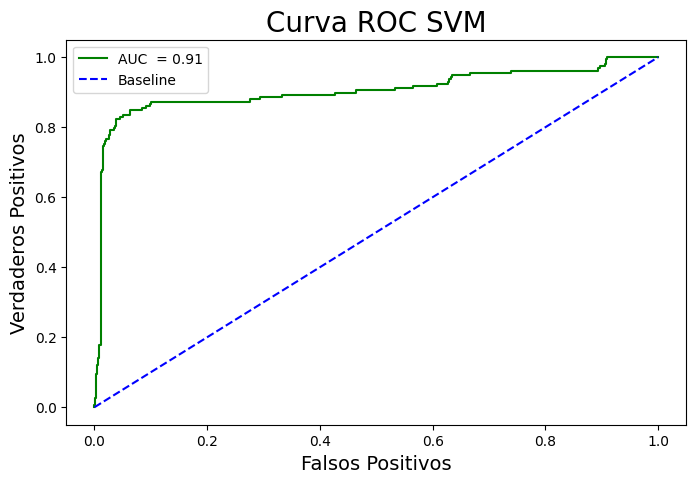

In [403]:
decision_values = clf_SVM.decision_function(X_test)
auc = metrics.roc_auc_score(y_test, decision_values)
fpr, tpr, thresholds = metrics.roc_curve(y_test, decision_values)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='green', label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC SVM', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

Observamos que la precisión del modelo lineal apenas ha variado con respecto a sus respectivos modelos por omisión. Ha obtenido una mejora, pero no es comparable con la que podemos observar en el modelo de SVM. Dicha diferencia entre ambos modelos se debe a que el problema estaba preparado para ser resuelto de forma más satisfactorio por un SVM que por un modelo lineal, al ser un problema de clasificación. En cuanto al SVM, podemos observar que ha obtenido un número bastante bajo de falsos positivos y negativos.

A continuación, vamos a ver de forma gráfica el desempeño que realiza en la precisión del entrenamiento los hiperparámetros del modelo lineal: C. Solo comprobaremos el desempeño de esta hiperparámetro ya que el resto de hiperparámetros dependen unos de otros, por lo que una representación gráfica de estos resultaría confusa.

El hiperparámetro 'C' en un modelo lineal corresponde a un parámetro de regularización que define cuánto permitimos que el modelo se ajuste a los datos de entrenamiento.

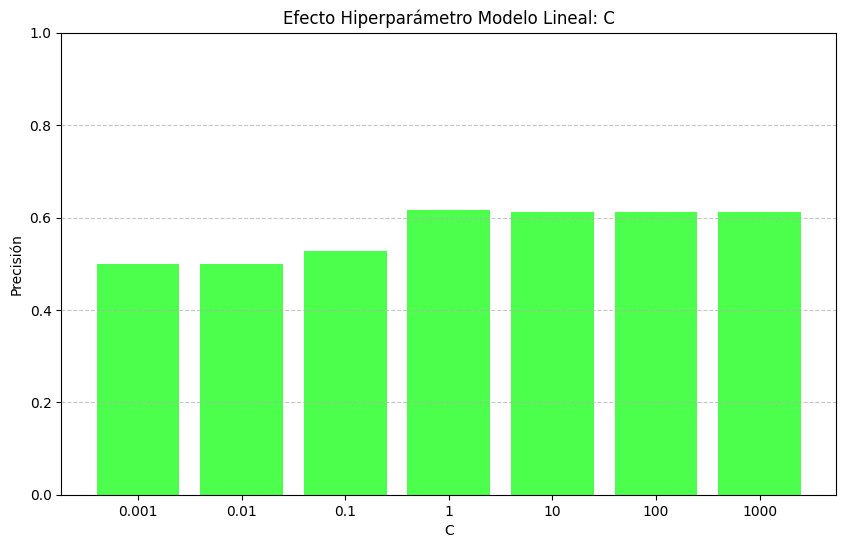

In [404]:
# Lista de valores de C
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_values_linear = []

for C in C_values:
    clf_linear = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(C=C, penalty='l1', solver='saga', random_state=100495773))])
    clf_linear.fit(X_train, y_train)
    y_pred = clf_linear.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_linear.append(accuracy)

# Graficar el efecto de C sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar([str(C) for C in C_values], accuracy_values_linear, color='lime', alpha=0.7)
plt.title('Efecto Hiperparámetro Modelo Lineal: C')
plt.xlabel('C')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como podemos comprobar en esta gráfica, el hiperparámetros del modelo lineal no sufre cambios significativos entre sí, aunque el valor 1 destaca sobre el resto.

Volvemos a poner los mejores hiperparámetros.

In [405]:
clf_linear = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(C=1000, penalty='l1', solver='saga', random_state=100495773))])
clf_linear.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1000, penalty='l1',
                                    random_state=100495773, solver='saga'))])

Ahora vamos a ver de forma gráfica el desempeño que realiza en la precisión del entrenamiento los hiperparámetros del modelo lineal: C, gamma y kernel.

Al igual que en el modelo lineal, el hiperparámetro 'C' en un modelo lineal define el permiso que le damos a este para ajustarse al modelo.

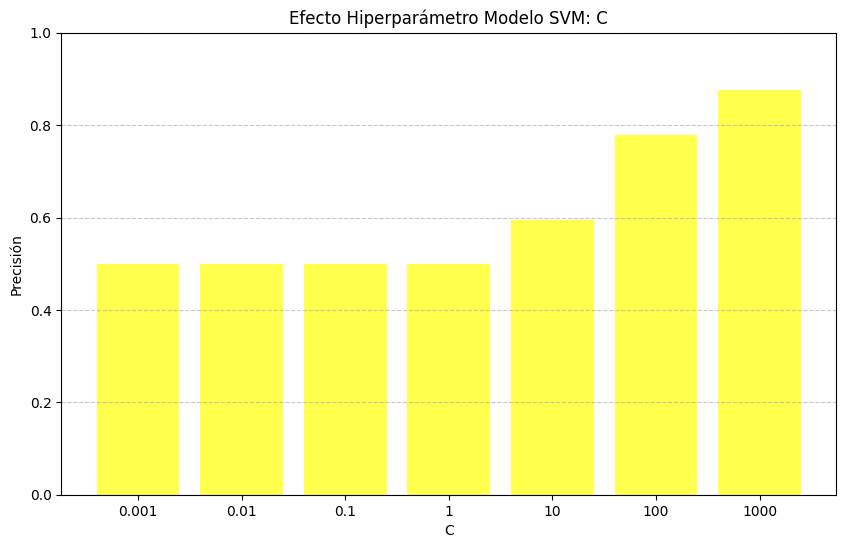

In [406]:
# Lista de valores de C
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_values_SVM = []

for C in C_values:
    clf_SVM = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SVC(C=C, gamma='auto', kernel='rbf', random_state=100495773))])
    clf_SVM.fit(X_train, y_train)
    y_pred = clf_SVM.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_SVM.append(accuracy)

# Graficar el efecto de C sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar([str(C) for C in C_values], accuracy_values_SVM, color='yellow', alpha=0.7)
plt.title('Efecto Hiperparámetro Modelo SVM: C')
plt.xlabel('C')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El hiperparámetro gamma controla cuánta influencia en el modelo final tiene cada muestra del entrenamiento.

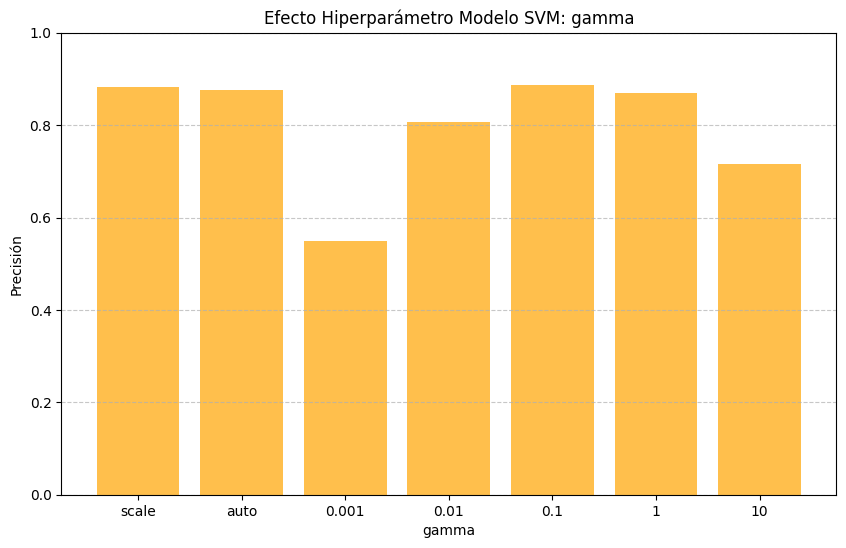

In [407]:
# Lista de valores de gamma
gamma_values = ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
accuracy_values_SVM = []

for gamma in gamma_values:
    clf_SVM = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SVC(C=1000, gamma=gamma, kernel='rbf', random_state=100495773))])
    clf_SVM.fit(X_train, y_train)
    y_pred = clf_SVM.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_SVM.append(accuracy)

# Graficar el efecto de gamma sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar([str(gamma) for gamma in gamma_values], accuracy_values_SVM, color='orange', alpha=0.7)
plt.title('Efecto Hiperparámetro Modelo SVM: gamma')
plt.xlabel('gamma')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como hemos definido antes, el hiperparámetro kernel corresponde a la metodología de SVM a emplear para encontrar la mejor frontera que separa los datos del problema.

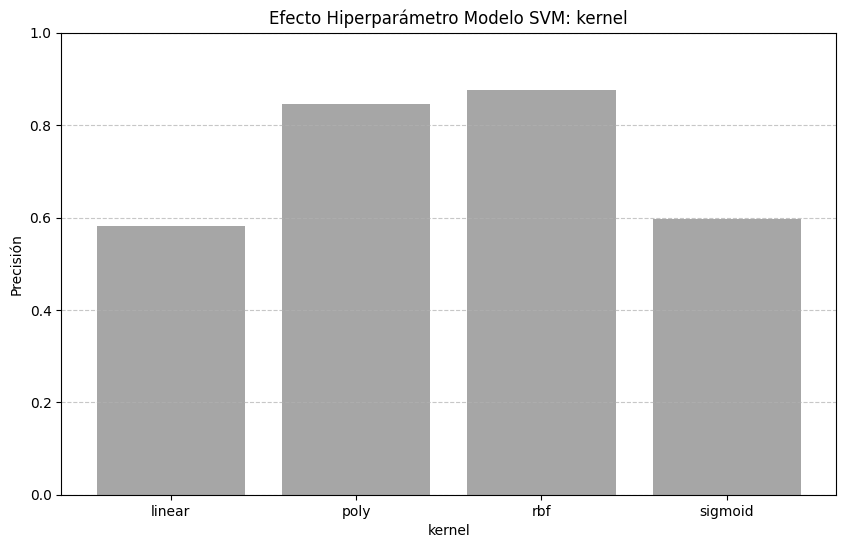

In [408]:
# Lista de valores de kernel
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_values_SVM = []

for kernel in kernel_values:
    clf_SVM = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SVC(C=1000, gamma='auto', kernel=kernel, random_state=100495773))])
    clf_SVM.fit(X_train, y_train)
    y_pred = clf_SVM.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_SVM.append(accuracy)

# Graficar el efecto de kernel sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar([str(kernel) for kernel in kernel_values], accuracy_values_SVM, color='grey', alpha=0.7)
plt.title('Efecto Hiperparámetro Modelo SVM: kernel')
plt.xlabel('kernel')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Volvemos a poner los mejores hiperparámetros.

In [409]:
clf_SVM = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(C=1000, gamma='auto', kernel='rbf', random_state=100495773))])
clf_SVM.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 SVC(C=1000, gamma='auto', random_state=100495773))])

Como podemos observar en las gráficas, la mayoría de valores de los hiperparámetros de SVM coinciden con la mejor precisión dada, exceptuando gamma. Al igual que con max_depth en el árbol de decisión, consideramos que el buscador de hiperparámetros ha considerado oportuno emplear uno por encima del otro con el fin de no generar ruido.

#Selección Modelo Final

Tras haber generado anteriormente los modelos de los 4 métodos diferentes propuestos, vamos a hacer una comparativa de cual es el mejor. Para ello vamos a comparar los diferentes valores de precisión dados, empleando como dicho valor el dado por el cross validation, que consiste en calcular la media del recall.

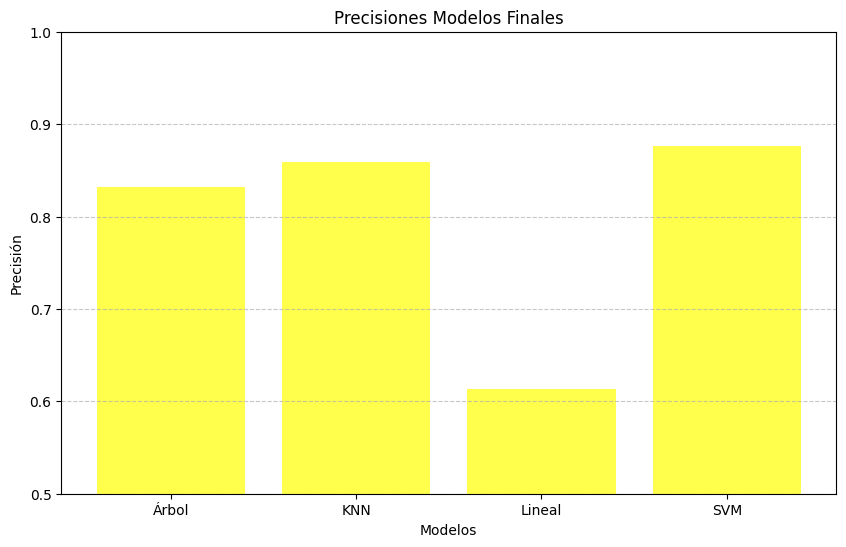

In [432]:
# Lista de modelos final
model_values = [clf_tree, clf_KNN, clf_linear, clf_SVM]
accuracy_values_models = []

for model in model_values:
    y_pred = model.predict(X_test);
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_models.append(accuracy)

# Graficar el efecto de los modelos sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(['Árbol', 'KNN', 'Lineal', 'SVM'], accuracy_values_models, color='yellow', alpha=0.7)
plt.title('Precisiones Modelos Finales')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.ylim(0.5, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dados los resultados obtenidos, podemos comprobar que el modelo SVM es mejor que el resto de modelos, seguido del de KNN. Tambien podemos obsrevar que, debido a que esto es un problema de clasificación, el modelo lineal de regiresión tiene una precisión bastante baja. En conclusión, SVM será el modelo que emplearemos en el otro notebook para crear el modelo final y generar predicciones en base a los datos del dataset de "competition". Además, consideraremos que los valores a introducir en el .csv que contenga las predicciones estarán codificados para una mejor lectura de estos, además de una mejor interpretación de herramientas que sean incapaces de manipular datos categóricos.

#Tarea adicional: Random Forest

Como tarea adicional, introduciremos un Random Forest bastante básico para comparar las diferencias tanto de precisión como de coste computacional en comparación con el resto de métodos empleados en la práctica.

El método Random Forest consiste en la generación de muchos árboles de decisión, para su posterior ensamble. Gracias a ello obtenemos la interpretación por parte de cada uno de estos árboles de los datos de entreno. En los problemas de clasificación, las predicciones obtenidas por este tipo de modelos se basan en las clases más votadas por el conjunto de árboles. Dado que esto es un problema de clasificación, emplearemos un Random Forest de clasificación.

Dado que el preproceso ya lo hemos hecho en el resto de modelos, podemos copiar este preproceso por omisión.

In [254]:
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

In [255]:
cat_random = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('pca', PCA(n_components=25, random_state=100495773))
])

In [256]:
num_random = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [257]:
p_random = ColumnTransformer(
    transformers=[
        ('num', num_random, num_cols),
        ('cat', cat_random, cat_cols)
    ])

Aquí crearemos el random forest por omisión. Consideraremos el caso por omisión con el hiperparámetro n_estimators.

In [258]:
random_clf = Pipeline(steps=[
    ('preprocessor', p_random),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=100495773))
    ])

In [259]:
start_time = time.time()
random_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=100495773))])

In [260]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 1.1579 segundos


Como podemos observar, el tiempo de entreno ha sido de 1,15s, con su debido margen de error. Este tiempo es bastante alto para ser simplemente un caso base, demostración de la carga computacional que conlleva dicho método.

Ahora vamos a comprobar las predicciones que este arbol realiza

In [261]:
#Predicciones de nuestro modelo con Random Forest
y_pred_train_tree = random_clf.predict(X_train)
y_pred_test_tree = random_clf.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train_tree)
print(f"Precisión del modelo Random Forest con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test_tree)
print(f"Precisión del modelo Random Forest con test: {accuracy_test}")

Precisión del modelo Random Forest con train: 0.9873417721518987
Precisión del modelo Random Forest con test: 0.8361745049123779


Podemos observar que, para ser un caso base, sus resultados son bastante satisfactorios.

A continuación realizaremos la búsqueda de hiperparámetros para este método. Debido a la carga computacionalo que conlleva Grid Search y los resultados bastante buenos obtenidos con el caso base, emplearemos Randomized Search para buscar los mejores hiperparámetros. Al hiperparámetro n_estimators, le hemos metido los hiperparámetros que metimos en el árbol de decisión de la práctica, además del nuevo max_features.

In [262]:
param_dist = {'classifier__n_estimators': [10, 50, 100, 150, 200],
              'classifier__max_features': ['sqrt', 'log2'],
              'classifier__max_depth': [1, 5, 10, 15, 20],
              'classifier__min_samples_split': [2, 5, 10, 15, 20],
              'classifier__min_samples_leaf': [1, 2, 5, 10, 20]}

inner = KFold(n_splits=3, shuffle=True, random_state=100495773)

random_search = RandomizedSearchCV(random_clf,
                         param_distributions=param_dist,
                         scoring='balanced_accuracy',
                         refit=True,
                         cv=inner,
                         n_jobs=-1,
                         verbose=1)

In [263]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=100495773, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction'...
                                             ('classifier',
                                              RandomForestClassifier(random_state=100495773))]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [1, 5, 10, 15,
                                                                  20],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         5, 10,
                                                                         20],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10,
                                                                          15,
                                                                          20],
                                        'classifier__n_estimators': [10, 50,
                                                                     100, 150,
                                                                     200]},
                   scoring='balanced_accuracy', verbose=1)

Ha tardado 23 segundos en buscar los hiperparámetros adecuados.

In [264]:
random_search.best_score_

np.float64(0.6613661497587707)

In [265]:
random_search.best_params_

{'classifier__n_estimators': 50,
 'classifier__min_samples_split': 5,
 'classifier__min_samples_leaf': 2,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': 15}

En base a los nuevos hiperparámetros obtenidos, modificamos el Random Forest con los nuevos hiperparámetros.

In [266]:
random_clf = Pipeline(steps=[
    ('preprocessor', p_random),
    ('classifier', RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1,
                                          max_features='sqrt', max_depth=20, random_state=100495773))
    ])

In [274]:
start_time = time.time()
random_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, random_state=100495773))])

In [268]:
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

Tiempo de entrenamiento: 1.5822 segundos


Ahora el tiempo de ejecución del entrenamiento del modelo ha ascendido a los 1,58s, con su debido margen de error. Por lo que podemos comprobar, el coste computacional del nuevo modelo es bastante superior al del caso base.

Ahora comprobaremos la precisión del nuevo modelo.

In [280]:
#Predicciones de nuestro modelo con Random Forest
y_pred_train_tree = random_clf.predict(X_train)
y_pred_test_tree = random_clf.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train_tree)
print(f"Precisión del modelo Random Forest con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test_tree)
print(f"Precisión del modelo Random Forest con test: {accuracy_test}")

Precisión del modelo Random Forest con train: 0.9873417721518987
Precisión del modelo Random Forest con test: 0.8361745049123779


Por lo que podemos observar, el modelo no ha recibido ni una mejora y una degradación de los valores de precisión. Estos se mantienen idénticos. Por ello, podemos suponer que el Random Forest tiene por hiperparámetro dominante el n_estimators y que el resto de hiperparámetros son 'despreciables'. Al menos, esta es la conclusión a la que se ha llegado tras los resultados obtenidos.

Por ello, volvemos a cargar el modelo original.

In [276]:
random_clf = Pipeline(steps=[
    ('preprocessor', p_random),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=100495773))
    ])

In [277]:
random_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=100495773))])

Ahora presentaremos para este modelo diferentes representaciones gráficas de su precisión y la de su hiperparámetro n_estimators: matriz de confusión, curva ROC, gráfica n_estimators.

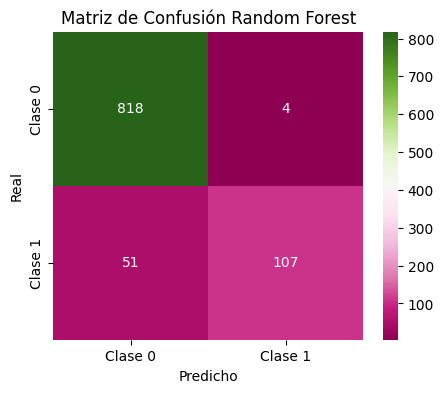

In [285]:
y_pred_test_tree = random_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Random Forest')
plt.show()

En la matriz de confusión podemos visualizar que lo que se ha detectado en mayor medida de forma erronea han sido los falsos negativos.

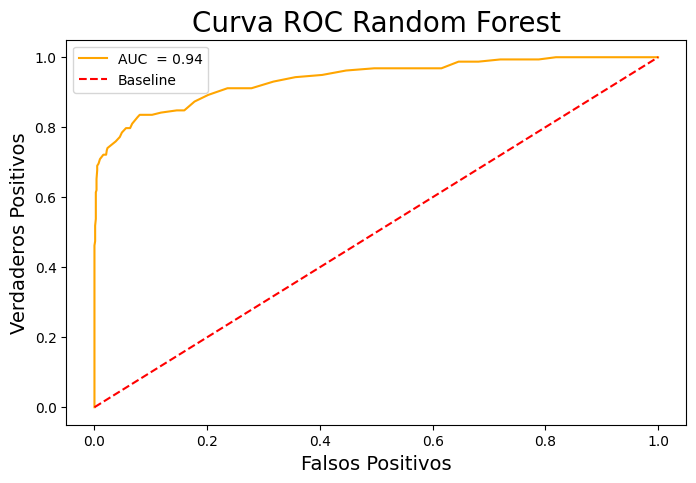

In [288]:
probs = random_clf.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='orange', label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')
plt.title('Curva ROC Random Forest', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

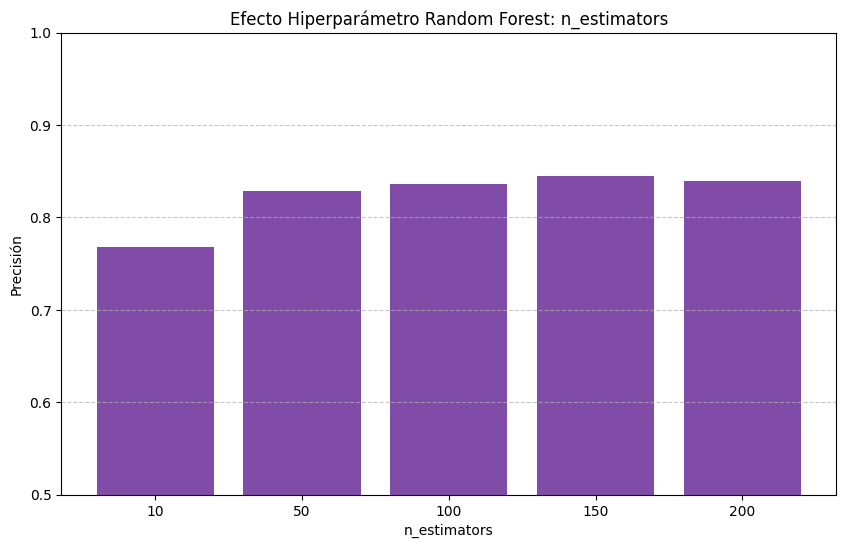

In [291]:
# Lista de valores de n_estimators
n_estimators_values = [10, 50, 100, 150, 200]
accuracy_values_random = []

for n_estimators in n_estimators_values:
    random_clf = Pipeline(steps=[
                         ('preprocessor', p_random),
                         ('classifier', RandomForestClassifier(n_estimators = n_estimators, random_state=100495773))
                 ])
    random_clf.fit(X_train, y_train)
    y_pred = random_clf.predict(X_test)

    # Calcular la precisión
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_random.append(accuracy)

# Graficar el efecto de n_estimators sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar([str(n_estimators) for n_estimators in n_estimators_values], accuracy_values_random, color='indigo', alpha=0.7)
plt.title('Efecto Hiperparámetro Random Forest: n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Precisión')
plt.ylim(0.5, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En la gráfica se visualiza que, por una diferencia bastante pequeña, el mejor valor para n_estimators es 150. Dado que el resultado es bastante extraño, debido a que hemos seleccionado el valor 100 como mejor valor, vamos a realizar una prueba con 150 para ver si es mejor valor que 100.

In [293]:
random_clf = Pipeline(steps=[
    ('preprocessor', p_random),
    ('classifier', RandomForestClassifier(n_estimators = 150, random_state=100495773))
    ])

In [296]:
random_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'Nu...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('pca',
                                                                   PCA(n_components=25,
                                                                       random_state=100495773))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=150,
                                        random_state=100495773))])

In [295]:
#Predicciones de nuestro modelo con Random Forest
y_pred_train_tree = random_clf.predict(X_train)
y_pred_test_tree = random_clf.predict(X_test)

accuracy_train = balanced_accuracy_score(y_train, y_pred_train_tree)
print(f"Precisión del modelo Random Forest con train: {accuracy_train}")

accuracy_test = balanced_accuracy_score(y_test, y_pred_test_tree)
print(f"Precisión del modelo Random Forest con test: {accuracy_test}")

Precisión del modelo Random Forest con train: 0.9920886075949367
Precisión del modelo Random Forest con test: 0.8450599032923711


Gracias a la prueba realizada, podemos ver que n_estimators=150 da un ligéramente mejor valor que n_estimators=100. Entonces, a pesar de ser una diferencia mínima, escogeremos este nuevo modelo creado.

Por último vamos a comparar el modelo creado con Random Forest con el resto de modelos.

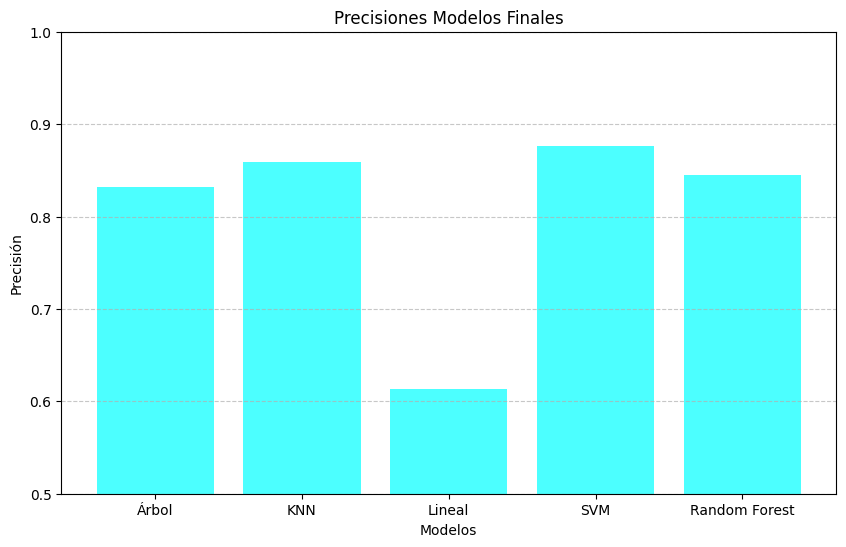

In [434]:
# Lista de modelos final
model_values = [clf_tree, clf_KNN, clf_linear, clf_SVM, random_clf]
accuracy_values_models = []

for model in model_values:
    y_pred = model.predict(X_test);
    accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy_values_models.append(accuracy)

# Graficar el efecto de los modelos sobre la precisión en una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(['Árbol', 'KNN', 'Lineal', 'SVM', 'Random Forest'], accuracy_values_models, color='cyan', alpha=0.7)
plt.title('Precisiones Modelos Finales')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.ylim(0.5, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En conclusión, dada la gráfica ofrecida podemos ver que el modelo de clasificación de random forest que hemos creado se encuentra a la par que el del árbol de decision, y no supera a KNN o SVM. Por ello, afirmamos que este método no es tan bueno para el procesamiento de nuestros datos. Probablemente otros modelos de Random Forest surtirían mejor efecto que este, modelos más potente que el planteado en este apartado extra.